Deep neural networks can learn anything (as long as they have enough representational power). Here we will shuffle just the labels, so there is no relationship between x and y. We hopefully will see, that the training loss go down, but the validation loss not at all. The neural network will memorize the training data and not generalize at all, but it is capable to learn the random (useless) conections between training data and labels

In [1]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), _ = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
import numpy as np
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]**2)
x_train = x_train.astype("float32") / 255

In [3]:
# shuffle labels
print(f"BERFORE\nfirst labels: {y_train[:10]}")

np.random.shuffle(y_train)

print(f"AFTER\nfirst labels: {y_train[:10]}")

BERFORE
first labels: [5 0 4 1 9 2 1 3 1 4]
AFTER
first labels: [9 8 5 5 2 8 2 5 8 6]


In [4]:
# model
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Dense(512, activation="relu"),
    Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

res = model.fit(x_train,
                y_train,
                epochs=100,
                batch_size=128,
                validation_split=0.2,
                verbose=0)

In [5]:
res.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

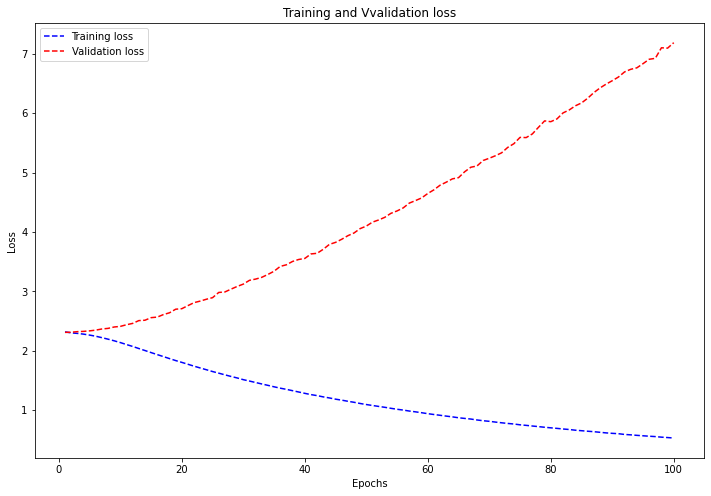

In [12]:
import matplotlib.pyplot as plt

acc = res.history["accuracy"]
loss = res.history["loss"]
val_acc = res.history["val_accuracy"]
val_loss = res.history["val_loss"]

x_range = range(1, len(val_acc) + 1)


plt.figure(figsize=(12,8))
plt.plot(x_range, loss, "b--", label="Training loss")
plt.plot(x_range, val_loss, "r--", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Vvalidation loss")
plt.legend()
plt.show()

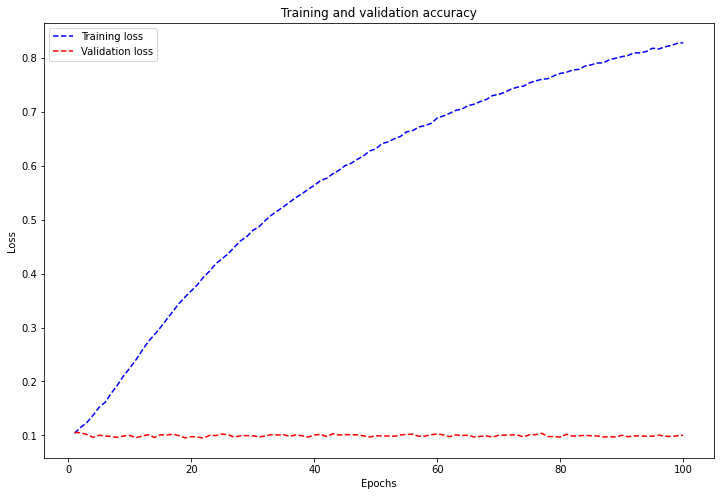

In [13]:
plt.figure(figsize=(12,8))
plt.plot(x_range, acc, "b--", label="Training loss")
plt.plot(x_range, val_acc, "r--", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and validation accuracy")
plt.legend()
plt.show()